In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

In [60]:
N = 2**12 # 4096 pt FFT 
fs = 2**15 # 32768Hz sampling

# Create 1s worth of x samples
x = np.linspace(0.0, 1.0, fs)
x.shape

(32768,)

In [61]:
yt = np.sin(2 * np.pi * 1000 * x) + np.sin(2 * np.pi * 40 * x)
yt.shape

(32768,)

<IPython.core.display.Javascript object>


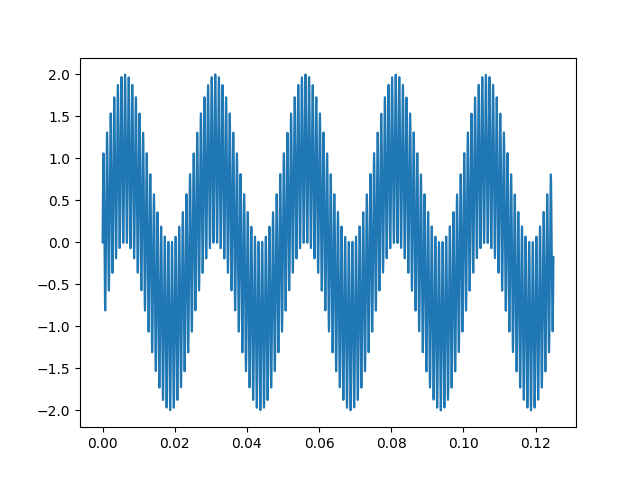

In [62]:
plt.plot(x[:N], yt[:N])

In [63]:
sp = np.fft.fft(yt[:N])
sp

array([-0.01090949+0.j        , -0.0109069 -0.02704393j,
       -0.0108977 -0.06152794j, ..., -0.01087493+0.12019081j,
       -0.0108977 +0.06152794j, -0.0109069 +0.02704393j])

In [64]:
mag = np.absolute(sp)
phase = np.angle(sp)
mag_new = np.zeros(N, dtype=np.complex128)
mag_new[0] = mag[0]
mag_new[1:(N//2) + 1] = mag[1:(N//2) + 1]
mag_new[(N//2)+1:] = mag[(N//2)-1:0:-1]
phase_new = np.zeros(N, dtype=np.complex128)
phase_new[0] = phase[0]
phase_new[1:N//2 + 1] = phase[1:(N//2) + 1]
phase_new[(N//2) + 1:] = -phase[(N//2)-1:0:-1]
sp_new = mag_new * np.exp(1j*phase_new)
sp_new

array([-0.01090949+1.33602778e-18j, -0.0109069 -2.70439314e-02j,
       -0.0108977 -6.15279353e-02j, ..., -0.01087493+1.20190808e-01j,
       -0.0108977 +6.15279353e-02j, -0.0109069 +2.70439314e-02j])

In [65]:
phase

array([ 3.14159265, -1.95414699, -1.74609621, ...,  1.66103115,
        1.74609621,  1.95414699])

<IPython.core.display.Javascript object>


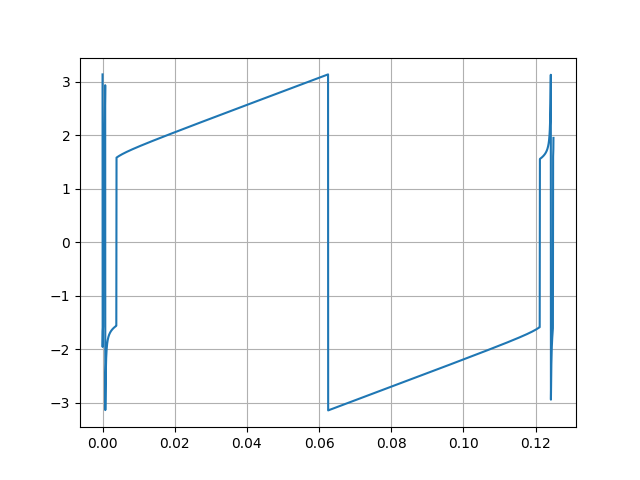

In [67]:
plt.plot(x[:N], phase)
plt.grid()

<IPython.core.display.Javascript object>


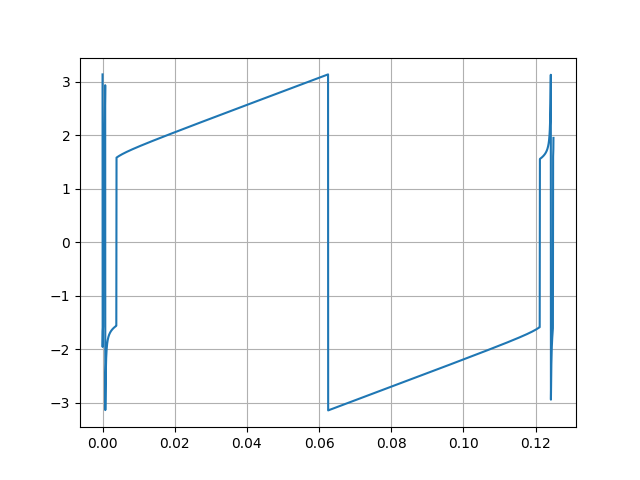

In [68]:
plt.plot(x[:N], phase_new)
plt.grid()

<IPython.core.display.Javascript object>


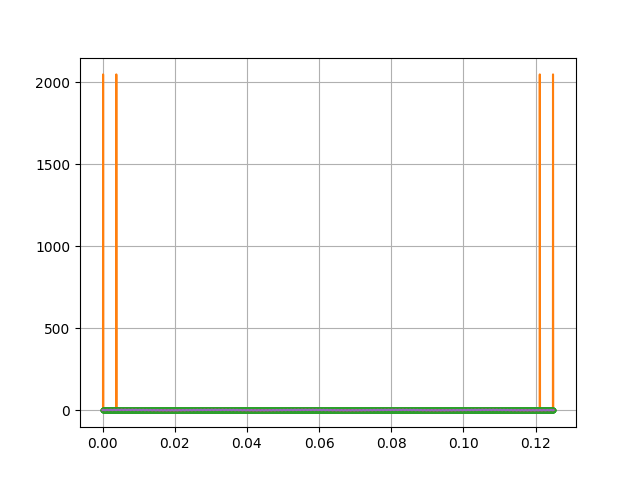

In [69]:
plt.plot(x[:N], phase_new - phase)
plt.grid()

<IPython.core.display.Javascript object>


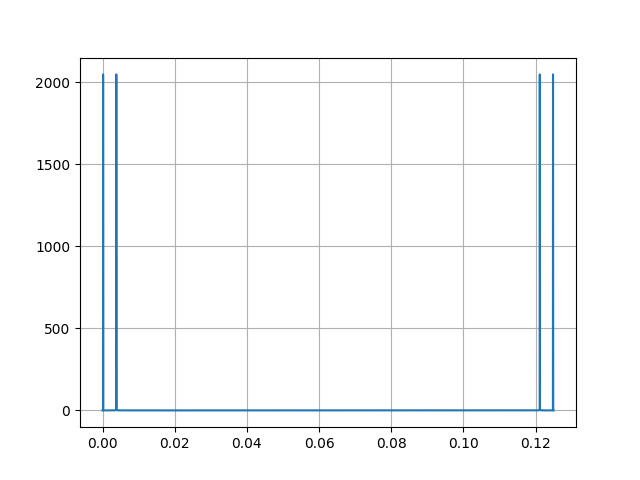

In [75]:
plt.plot(x[:N], mag)
plt.grid()

<IPython.core.display.Javascript object>


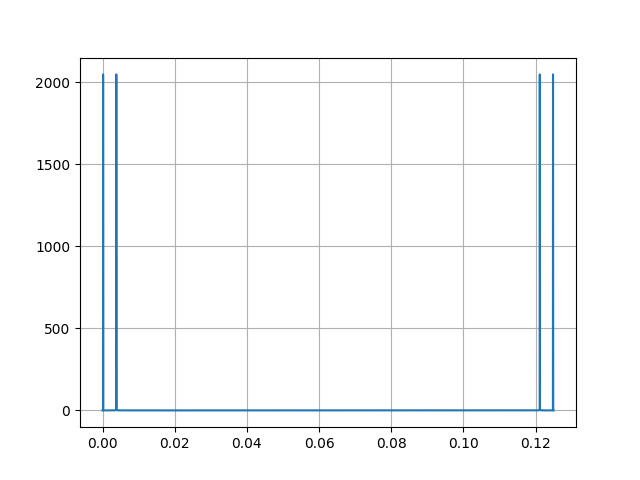

In [76]:
plt.plot(x[:N], mag_new)
plt.grid()

In [77]:
(mag_new - mag)[-50:]

array([ 2.77555756e-17+0.j, -7.63278329e-15+0.j,  1.38777878e-17+0.j,
       -1.44328993e-14+0.j, -1.38777878e-17+0.j, -1.21569421e-14+0.j,
        2.08166817e-17+0.j,  2.83384427e-14+0.j, -6.93889390e-18+0.j,
        9.35362898e-15+0.j, -3.46944695e-17+0.j, -2.65863720e-14+0.j,
       -3.46944695e-18+0.j, -3.70189990e-15+0.j,  3.12250226e-17+0.j,
        4.19143886e-14+0.j,  4.51028104e-17+0.j,  1.36800293e-14+0.j,
        0.00000000e+00+0.j, -1.20806143e-14+0.j, -5.37764278e-17+0.j,
       -2.26867136e-14+0.j,  5.72458747e-17+0.j, -7.36563588e-15+0.j,
        4.68375339e-17+0.j, -5.44356227e-15+0.j,  1.21430643e-17+0.j,
        4.10955991e-15+0.j, -4.51028104e-17+0.j,  2.75682255e-14+0.j,
       -3.46944695e-18+0.j, -6.13745166e-15+0.j,  1.73472348e-17+0.j,
       -1.60912950e-14+0.j, -1.04083409e-17+0.j,  3.81569776e-14+0.j,
        7.63278329e-17+0.j,  2.48065457e-14+0.j, -6.93889390e-18+0.j,
        9.29811783e-16+0.j, -1.11022302e-16+0.j, -7.67441666e-15+0.j,
        0.00000000e+

<IPython.core.display.Javascript object>


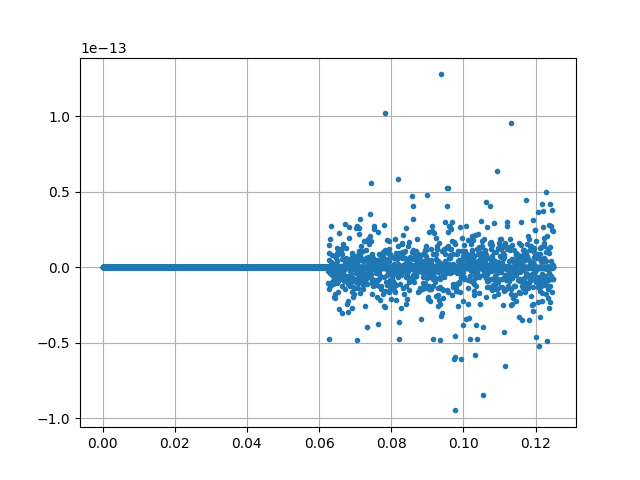

In [78]:
plt.plot(x[:N], mag_new - mag, '.')
plt.grid()

<IPython.core.display.Javascript object>


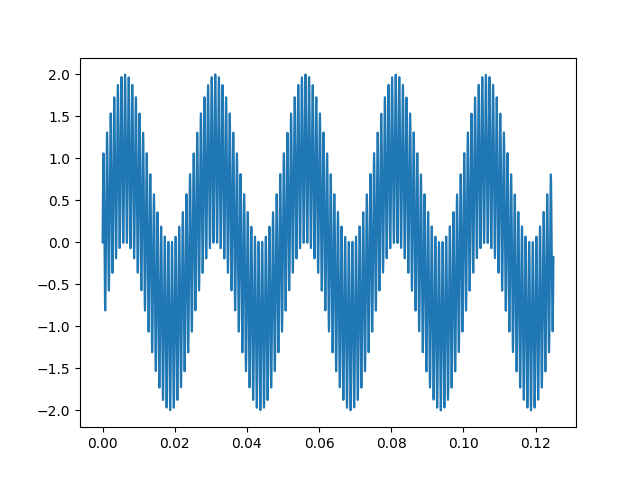

In [79]:
plt.plot(x[:N], np.fft.ifft(sp))

<IPython.core.display.Javascript object>


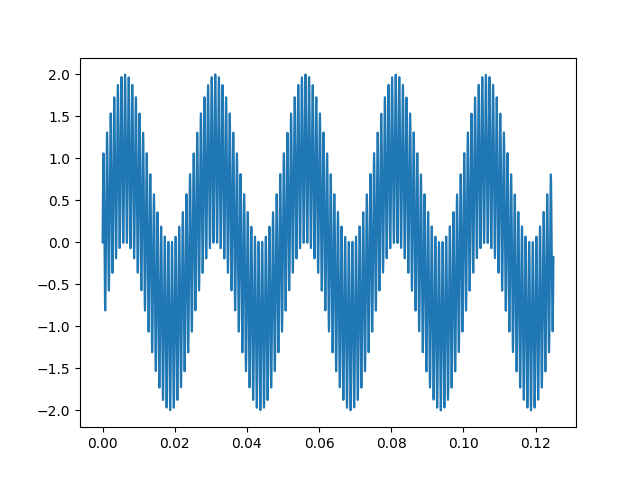

In [80]:
plt.plot(x[:N], np.fft.ifft(sp_new))

In [19]:
import struct

In [20]:
with open("bram_sine_init.coe", "w") as f:
    f.write(f"memory_initialization_radix=16;\n")
    f.write(f"memory_initialization_vector=\n")
    for val in yt[:N]:
        val = int(val * (10**4))
        res = struct.pack("<h", val)
        print(val)
        print(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}")
        f.write(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}\n")

0
0000
1982
07be
3895
0f37
5670
1626
7246
1c4e
8568
2178
9589
2575
10276
2824
10606
296e
10569
2949
10171
27bb
9427
24d3
8369
20b1
7037
1b7d
5484
156c
3769
0eb9
1958
07a6
120
0078
-1674
f976
-3357
f2e3
-4864
ed00
-6136
e808
-7125
e42b
-7792
e190
-8108
e054
-8061
e083
-7648
e220
-6882
e51e
-5788
e964
-4405
eecb
-2779
f525
-968
fc38
964
03c4
2950
0b86
4920
1338
6804
1a94
8536
2158
10054
2746
11306
2c2a
12249
2fd9
12851
3233
13092
3324
12967
32a7
12482
30c2
11658
2d8a
10528
2920
9135
23af
7535
1d6f
5787
169b
3959
0f77
2119
0847
340
0154
-1312
fae0
-2775
f529
-3991
f069
-4913
eccf
-5506
ea7e
-5744
e990
-5617
ea0f
-5126
ebfa
-4287
ef41
-3129
f3c7
-1691
f965
-23
ffe9
1814
0716
3759
0eaf
5741
166d
7689
1e09
9536
2540
11216
2bd0
12669
317d
13845
3615
14703
396f
15214
3b6e
15362
3c02
15143
3b27
14568
38e8
13661
355d
12457
30a9
11002
2afa
9352
2488
7571
1d93
5724
165c
3883
0f2b
2118
0846
494
01ee
-924
fc64
-2086
f7da
-2944
f480
-3466
f276
-3630
f1d2
-3427
f29d
-2864
f4d0
-1959
f859
-742
fd1a
743

-17944
b9e8
-18533
b79b
-18762
b6b6
-18623
b741
-18124
b934
-17284
bc7c
-16135
c0f9
-14720
c680
-13093
ccdb
-11315
d3cd
-9451
db15
-7572
e26c
-5747
e98d
-4045
f033
-2529
f61f
-1256
fb18
-273
feef
381
017d
683
02ab
620
026c
194
00c2
-581
fdbb
-1678
f972
-3057
f40f
-4669
edc3
-6456
e6c8
-8353
df5f
-10291
d7cd
-12200
d058
-14011
c945
-15659
c2d5
-17083
bd45
-18233
b8c7
-19067
b585
-19556
b39c
-19681
b31f
-19440
b410
-18841
b667
-17907
ba0d
-16674
bede
-15187
c4ad
-13501
cb43
-11678
d262
-9786
d9c6
-7895
e129
-6075
e845
-4392
eed8
-2909
f4a3
-1681
f96f
-754
fd0e
-161
ff5f
75
004b
-54
ffca
-545
fddf
-1379
fa9d
-2527
f621
-3947
f095
-5586
ea2e
-7386
e326
-9280
dbc0
-11198
d442
-13072
ccf0
-14832
c610
-16414
bfe2
-17759
baa1
-18820
b67c
-19557
b39b
-19943
b219
-19963
b205
-19618
b35e
-18920
b618
-17894
ba1a
-16578
bf3e
-15020
c554
-13277
cc23
-11413
d36b
-9496
dae8
-7596
e254
-5782
e96a
-4122
efe6
-2674
f58e
-1494
fa2a
-622
fd92
-91
ffa5
78
004e
-116
ff8c
-670
fd62
-1561
f9e7
-2758
f53a
-4214

daed
-10216
d818
-10587
d6a5
-10592
d6a0
-10233
d807
-9527
dac9
-8502
deca
-7199
e3e1
-5668
e9dc
-3968
f080
-2165
f78b
-326
feba
1476
05c4
3175
0c67
4705
1261
6006
1776
7030
1b76
7734
1e36
8091
1f9b
8084
1f94
7712
1e20
6985
1b49
5927
1727
4574
11de
2972
0b9c
1179
049b
-743
fd19
-2726
f55a
-4702
eda2
-6599
e639
-8350
df62
-9896
d958
-11180
d454
-12160
d080
-12801
cdff
-13084
cce4
-12999
cd39
-12554
cef6
-11767
d209
-10669
d653
-9303
dba9
-7723
e1d5
-5989
e89b
-4166
efba
-2325
f6eb
-535
fde9
1135
046f
2621
0a3d
3868
0f1c
4825
12d9
5456
1550
5735
1667
5649
1611
5199
144f
4398
112e
3274
0cca
1865
0749
221
00dd
-1601
f9bf
-3537
f22f
-5518
ea72
-7474
e2ce
-9336
db88
-11037
d4e3
-12519
cf19
-13728
ca60
-14623
c6e1
-15174
c4ba
-15363
c3fd
-15186
c4ae
-14650
c6c6
-13779
ca2d
-12606
cec2
-11176
d458
-9546
dab6
-7776
e1a0
-5933
e8d3
-4088
f008
-2311
f6f9
-668
fd64
776
0308
1969
07b1
2864
0b30
3425
0d61
3629
0e2d
3468
0d8c
2945
0b81
2077
081d
893
037d
-564
fdcc
-2244
f73c
-4088
f008
-6030
e872
-80

In [55]:
N = 20

In [56]:
zerostest = np.zeros(N)
source = np.linspace(1, N, N)
zerostest[0] = source[0]
zerostest[1:(N//2) + 1] = source[1:(N//2) + 1]
zerostest[(N//2) + 1:] = source[(N//2)-1:0:-1]
zerostest

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.])

In [57]:
source

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])